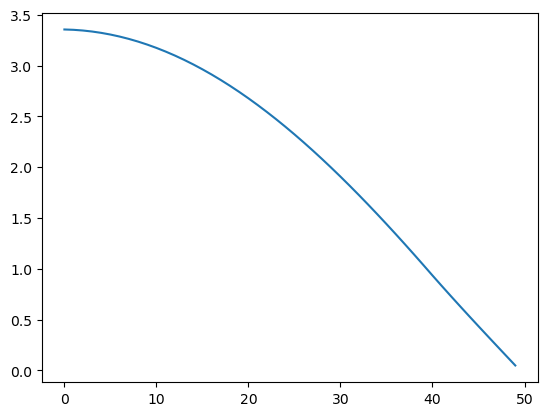

In [5]:
from matplotlib import pyplot as plt
import numpy as np

region1 = {'length':[0,40,40],'D':7,'microxs_abs':0.25,'vmicroxs_fis':0.65}
region2 = {'length':[40,50,10],'D':6,'microxs_abs':0.01,'vmicroxs_fis':0}

mesh_size=1
flux=[1 for _ in range(int(region1['length'][2]//mesh_size))]+[1 for _ in range(int(region2['length'][2]//mesh_size))]
cur = [0 for _ in range(int(region1['length'][2]//mesh_size))]+[0 for _ in range(int(region2['length'][2]//mesh_size-1))]
k=1
#s=[region1['vmicroxs_fis']*mesh_size/k for _ in range(int(region1['length'][2]//mesh_size))]+[region2['vmicroxs_fis']*mesh_size/k for _ in range(int(region2['length'][2]//mesh_size))]


for i in range(1000):
    old_k=k
    temp_flux=[]
    s=[region1['vmicroxs_fis']*flux[i1]*mesh_size/k for i1 in range(int(region1['length'][1]-region1['length'][0]//mesh_size))]+[region2['vmicroxs_fis']*flux[i1]*mesh_size/k for i1 in range(int(region2['length'][1]-region2['length'][0]//mesh_size))]
    for j in range(len(flux)):
        if j < region1['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region1['D']*flux[j+1])/(1*region1['D']+region1['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            elif j == len(flux)-1:
                temp = (s[j]*mesh_size+region1['D']*flux[j-1])/(2*region1['D']+region1['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region1['D']*flux[j+1]+region1['D']*flux[j-1])/(2*region1['D']+region1['microxs_abs']*mesh_size)
                temp_flux.append(temp)
        elif j < region2['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region2['D']*flux[j+1])/(2*region2['D']+region2['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            elif j == len(flux)-1:
                D_15=2*region2['D']
                temp = (s[j]*mesh_size+region2['D']*flux[j-1])/(region2['D']+D_15+region2['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region2['D']*flux[j+1]+region2['D']*flux[j-1])/(2*region2['D']+region2['microxs_abs']*mesh_size)
                temp_flux.append(temp)
    upper=sum([region1['vmicroxs_fis']*temp_flux[i1]*mesh_size for i1 in range(region1['length'][1])])+sum([region2['vmicroxs_fis']*temp_flux[i1]*mesh_size for i1 in range(region1['length'][1],region2['length'][1])])
    lower=sum([region1['vmicroxs_fis']*flux[i1]*mesh_size for i1 in range(region1['length'][1])])+sum([region2['vmicroxs_fis']*flux[i1]*mesh_size for i1 in range(region1['length'][1],region2['length'][1])])
    k=k*(upper/lower)
    flux=temp_flux
    
    new_s = [region1['vmicroxs_fis']*flux[i1]*mesh_size/k for i1 in range(int(region1['length'][1]-region1['length'][0]//mesh_size))]+[region2['vmicroxs_fis']*flux[i1]*mesh_size/k for i1 in range(int(region2['length'][1]-region2['length'][0]//mesh_size))]
    max_del_s=0
    for i in range(len(s)):
        if s[i] != 0:
            max_del_s = max((new_s[i]-s[i])/s[i],max_del_s)
    del_k = (k-old_k)/old_k
    if max_del_s < 10**-5 and del_k < 10**-6:
        print('Break condition achieved before total iteration')
        print('Final iteration number:',it)
        #실험해보니 iter=(1000,10000)사이에서 만족
        break


x = np.arange(len(flux))
y = flux
#print(flux)
#print(k)
plt.plot(x,y)
plt.show()




In [9]:
print(10**-3)

0.001


Break condition achieved before total iteration
Final iteration number: 3638


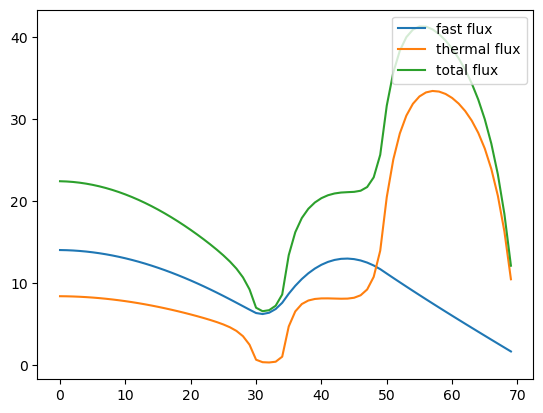

In [6]:
from matplotlib import pyplot as plt
import numpy as np

region1 = {'length':[0,30,30],'D1':1.4,'D2':0.2,'microxs_abs1':0.01,'microxs_abs2':0.1,'vmicroxs_fis1':0.005,'vmicroxs_fis2':0.14,'microxs_sca':0.06}
region2 = {'length':[30,35,5],'D1':1.1,'D2':0.12,'microxs_abs1':0.05,'microxs_abs2':0.5,'vmicroxs_fis1':0,'vmicroxs_fis2':0,'microxs_sca':0.01}
region3 = {'length':[35,50,15],'D1':1.4,'D2':0.2,'microxs_abs1':0.01,'microxs_abs2':0.1,'vmicroxs_fis1':0.009,'vmicroxs_fis2':0.24,'microxs_sca':0.06}
region4 = {'length':[50,70,20],'D1':1.23,'D2':0.16,'microxs_abs1':0.0006,'microxs_abs2':0.019,'vmicroxs_fis1':0,'vmicroxs_fis2':0,'microxs_sca':0.05}

mesh_size=1
fast_flux=[1 for _ in range(int(region4['length'][1]//mesh_size))]
thermal_flux=[1 for _ in range(int(region4['length'][1]//mesh_size))]

k=1

#s1=[(region1['vmicroxs_fis1']+region1['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region1['length'][2]//mesh_size))]
#S2=[(region2['vmicroxs_fis1']+region2['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region2['length'][2]//mesh_size))]
#s3=[(region3['vmicroxs_fis1']+region3['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region3['length'][2]//mesh_size))]
#s4=[(region4['vmicroxs_fis1']+region4['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region4['length'][2]//mesh_size))]
#s=s1+s2+s3+s4


for it in range(10000):
    old_k=k
    temp_fast_flux=[]
    s1=[(region1['vmicroxs_fis1']*fast_flux[i1]+region1['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region1['length'][1]-region1['length'][0])//mesh_size))]
    s_2=[(region2['vmicroxs_fis1']*fast_flux[i1]+region2['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region2['length'][1]-region2['length'][0])//mesh_size))]
    s3=[(region3['vmicroxs_fis1']*fast_flux[i1]+region3['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region3['length'][1]-region3['length'][0])//mesh_size))]
    s4=[(region4['vmicroxs_fis1']*fast_flux[i1]+region4['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region4['length'][1]-region4['length'][0])//mesh_size))]
    s=s1+s_2+s3+s4
    
    for j in range(len(fast_flux)):
        if j < region1['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region1['D1']*fast_flux[j+1])/(1*region1['D1']+region1['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                temp = (s[j]*mesh_size+region1['D1']*fast_flux[j-1])/(2*region1['D1']+region1['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region1['D1']*fast_flux[j+1]+region1['D1']*fast_flux[j-1])/(2*region1['D1']+region1['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
        elif j < region2['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region2['D1']*fast_flux[j+1])/(1*region2['D1']+region2['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                temp = (s[j]*mesh_size+region2['D1']*fast_flux[j-1])/(2*region2['D1']+region2['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region2['D1']*fast_flux[j+1]+region2['D1']*fast_flux[j-1])/(2*region2['D1']+region2['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
        elif j < region3['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region3['D1']*fast_flux[j+1])/(1*region3['D1']+region3['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                temp = (s[j]*mesh_size+region3['D1']*fast_flux[j-1])/(2*region3['D1']+region3['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region3['D1']*fast_flux[j+1]+region3['D1']*fast_flux[j-1])/(2*region3['D1']+region3['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
        elif j < region4['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region4['D1']*fast_flux[j+1])/(1*region4['D1']+region4['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                D_3o2=region4['D1']/(mesh_size+2*region4['D1'])
                temp = (s[j]*mesh_size+region4['D1']*fast_flux[j-1])/(region4['D1']+D_3o2+region4['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region4['D1']*fast_flux[j+1]+region4['D1']*fast_flux[j-1])/(2*region4['D1']+region4['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
    
    s21=[region1['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region1['length'][1]-region1['length'][0])//mesh_size)]
    s22=[region2['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region2['length'][1]-region2['length'][0])//mesh_size)]
    s23=[region3['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region3['length'][1]-region3['length'][0])//mesh_size)]
    s24=[region4['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region4['length'][1]-region4['length'][0])//mesh_size)]
    s2=s21+s22+s23+s24

    temp_thermal_flux=[]
    for j in range(len(thermal_flux)):
        if j < region1['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region1['D2']*thermal_flux[j+1])/(1*region1['D2']+region1['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                temp = (s2[j]*mesh_size+region1['D2']*thermal_flux[j-1])/(2*region1['D2']+region1['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region1['D2']*thermal_flux[j+1]+region1['D2']*thermal_flux[j-1])/(2*region1['D2']+region1['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
        elif j < region2['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region2['D2']*thermal_flux[j+1])/(1*region2['D2']+region2['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                temp = (s2[j]*mesh_size+region2['D2']*thermal_flux[j-1])/(2*region2['D2']+region2['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region2['D2']*thermal_flux[j+1]+region2['D2']*thermal_flux[j-1])/(2*region2['D2']+region2['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
        elif j < region3['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region3['D2']*thermal_flux[j+1])/(1*region3['D2']+region3['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                temp = (s2[j]*mesh_size+region3['D2']*thermal_flux[j-1])/(2*region3['D2']+region3['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region3['D2']*thermal_flux[j+1]+region3['D2']*thermal_flux[j-1])/(2*region3['D2']+region3['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
        elif j < region4['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region4['D2']*thermal_flux[j+1])/(1*region4['D2']+region4['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                D_3o2=region4['D2']/(mesh_size+2*region4['D2'])
                temp = (s2[j]*mesh_size+region4['D2']*thermal_flux[j-1])/(region4['D2']+D_3o2+region4['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region4['D2']*thermal_flux[j+1]+region4['D2']*thermal_flux[j-1])/(2*region4['D2']+region4['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)

    upp1 = sum([(region1['vmicroxs_fis1']*temp_fast_flux[i1]+region1['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region1['length'][1]-region1['length'][0])/mesh_size))])
    upp2 = sum([(region2['vmicroxs_fis1']*temp_fast_flux[i1]+region2['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region2['length'][1]-region2['length'][0])/mesh_size))])
    upp3 = sum([(region3['vmicroxs_fis1']*temp_fast_flux[i1]+region3['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region3['length'][1]-region3['length'][0])/mesh_size))])
    upp4 = sum([(region4['vmicroxs_fis1']*temp_fast_flux[i1]+region4['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region4['length'][1]-region4['length'][0])/mesh_size))])
    upper=  upp1+upp2+upp3+upp4
    
    low1 = sum([(region1['vmicroxs_fis1']*fast_flux[i1]+region1['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region1['length'][1]-region1['length'][0])/mesh_size))])
    low2 = sum([(region2['vmicroxs_fis1']*fast_flux[i1]+region2['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region2['length'][1]-region2['length'][0])/mesh_size))])
    low3 = sum([(region3['vmicroxs_fis1']*fast_flux[i1]+region3['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region3['length'][1]-region3['length'][0])/mesh_size))])
    low4 = sum([(region4['vmicroxs_fis1']*fast_flux[i1]+region4['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region4['length'][1]-region4['length'][0])/mesh_size))])
    lower=low1+low2+low3+low4
    
    k=k*(upper/lower)
    fast_flux=temp_fast_flux
    thermal_flux=temp_thermal_flux
    
    s1=[(region1['vmicroxs_fis1']*fast_flux[i1]+region1['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region1['length'][1]-region1['length'][0])//mesh_size))]
    s_2=[(region2['vmicroxs_fis1']*fast_flux[i1]+region2['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region2['length'][1]-region2['length'][0])//mesh_size))]
    s3=[(region3['vmicroxs_fis1']*fast_flux[i1]+region3['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region3['length'][1]-region3['length'][0])//mesh_size))]
    s4=[(region4['vmicroxs_fis1']*fast_flux[i1]+region4['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region4['length'][1]-region4['length'][0])//mesh_size))]
    new_s=s1+s_2+s3+s4
    
    max_del_s=0
    for i in range(len(s)):
        if s[i] != 0:
            max_del_s = max((new_s[i]-s[i])/s[i],max_del_s)
    
    s21=[region1['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region1['length'][1]-region1['length'][0])//mesh_size)]
    s22=[region2['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region2['length'][1]-region2['length'][0])//mesh_size)]
    s23=[region3['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region3['length'][1]-region3['length'][0])//mesh_size)]
    s24=[region4['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region4['length'][1]-region4['length'][0])//mesh_size)]
    new_s2=s21+s22+s23+s24
    
    max_del_s2=0
    for i in range(len(s2)):
        if s2[i] != 0:
            max_del_s2 = max((new_s2[i]-s2[i])/s2[i],max_del_s2)
    del_k = (k-old_k)/old_k
    if max_del_s < 10**-5 and max_del_s2 < 10**-5:
        if del_k < 10**-6:
            print('Break condition achieved before total iteration')
            print('Final iteration number:',it)
            #실험해보니 iter=(1000,10000)사이에서 만족
            break
    

#print(k)
x1 = np.arange(len(fast_flux))
y1 = fast_flux
plt.plot(x1,y1,label='fast flux')
x2 = np.arange(len(thermal_flux))
y2 = thermal_flux
plt.plot(x2,y2,label='thermal flux')

tot_flux=[fast_flux[i]+thermal_flux[i] for i in range(len(fast_flux))]
x3 = np.arange(len(tot_flux))
y3 = tot_flux
plt.plot(x3,y3,label='total flux')
plt.legend(loc='upper right')
plt.show()




Break condition achieved before total iteration
Final iteration number: 2625


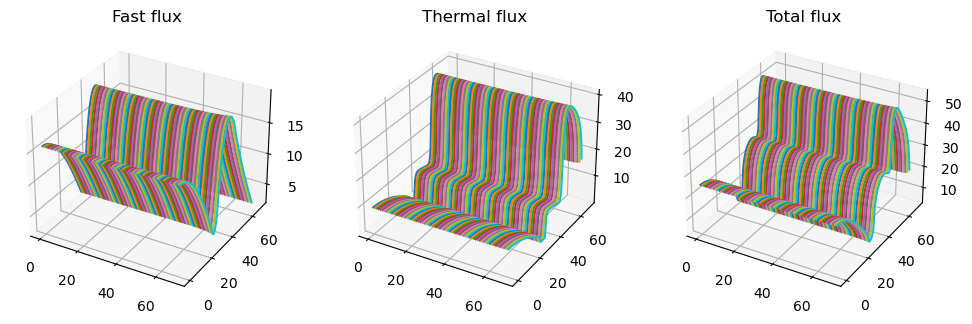

In [1]:
#prob 3

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(131, projection='3d')
ax2= fig.add_subplot(132, projection='3d')
ax3= fig.add_subplot(133, projection='3d')


region1 = {'length':[0,30,30],'D1':1.4,'D2':0.2,'microxs_abs1':0.01,'microxs_abs2':0.1,'vmicroxs_fis1':0.005,'vmicroxs_fis2':0.14,'microxs_sca':0.06}
region2 = {'length':[30,35,5],'D1':1.1,'D2':0.12,'microxs_abs1':0.05,'microxs_abs2':0.5,'vmicroxs_fis1':0,'vmicroxs_fis2':0,'microxs_sca':0.01}
region3 = {'length':[35,50,15],'D1':1.4,'D2':0.2,'microxs_abs1':0.01,'microxs_abs2':0.1,'vmicroxs_fis1':0.009,'vmicroxs_fis2':0.24,'microxs_sca':0.06}
region4 = {'length':[50,70,20],'D1':1.23,'D2':0.16,'microxs_abs1':0.0006,'microxs_abs2':0.019,'vmicroxs_fis1':0,'vmicroxs_fis2':0,'microxs_sca':0.05}

region1_y_length = 70

mesh_size=1


fast_flux=[[1 for _ in range(int(region4['length'][1]//mesh_size))] for _ in range(region1_y_length)]
thermal_flux=[[1 for _ in range(int(region4['length'][1]//mesh_size))] for _ in range(region1_y_length)]

k=1

def create_s(region,y):
    s=[(region['vmicroxs_fis1']*fast_flux[y][i1]+region['vmicroxs_fis2']*thermal_flux[y][i1])*mesh_size/k for i1 in range(int((region['length'][1]-region['length'][0])//mesh_size))]
    return s

def create_s2(region,y):
    s2=[region['microxs_sca']*fast_flux[y][i1]*mesh_size for i1 in range(int((region['length'][1]-region['length'][0])//mesh_size))]
    return s2

def create_upp(region,y):
    upp=sum([(region['vmicroxs_fis1']*temp_fast_flux[y][i1]+region['vmicroxs_fis2']*temp_thermal_flux[y][i1])*mesh_size for i1 in range(int((region['length'][1]-region['length'][0])/mesh_size))])
    return upp

def create_low(region,y):
    low=sum([(region['vmicroxs_fis1']*fast_flux[y][i1]+region['vmicroxs_fis2']*thermal_flux[y][i1])*mesh_size for i1 in range(int((region['length'][1]-region['length'][0])/mesh_size))])
    return low

def cal_region_to_y_f(region,fast_flux_for_y):
    for j in range(region1_y_length):
        if j == 0:
            temp = (s[j][x]*mesh_size+region['D1']*fast_flux_for_y[j+1][x])/(1*region['D1']+region['microxs_abs1']*mesh_size)
            fast_flux_for_y[j][x]=temp
        elif j == region1_y_length-1:
            temp = (s[j][x]*mesh_size+region['D1']*fast_flux_for_y[j-1][x])/(1*region['D1']+region['microxs_abs1']*mesh_size)
            fast_flux_for_y[j][x]=temp
        else:
            temp = (s[j][x]*mesh_size+region['D1']*fast_flux_for_y[j+1][x]+region['D1']*fast_flux_for_y[j-1][x])/(2*region['D1']+region['microxs_abs1']*mesh_size)
            fast_flux_for_y[j][x]=temp

def cal_region_to_y_t(region,thermal_flux_for_y):
    for j in range(region1_y_length):
        if j == 0:
            temp = (s2[j][x]*mesh_size+region['D2']*thermal_flux_for_y[j+1][x])/(1*region['D2']+region['microxs_abs2']*mesh_size)
            thermal_flux_for_y[j][x]=temp
        elif j == region1_y_length-1:
            temp = (s2[j][x]*mesh_size+region['D2']*thermal_flux_for_y[j-1][x])/(1*region['D2']+region['microxs_abs2']*mesh_size)
            thermal_flux_for_y[j][x]=temp
        else:
            temp = (s2[j][x]*mesh_size+region['D2']*thermal_flux_for_y[j+1][x]+region['D2']*thermal_flux_for_y[j-1][x])/(2*region['D2']+region['microxs_abs2']*mesh_size)
            thermal_flux_for_y[j][x]=temp

for it in range(10000):
    old_k = k
    s_xy = []
    for y in range(region1_y_length):
        s_x=create_s(region1,y)+create_s(region2,y)+create_s(region3,y)+create_s(region4,y)
        s_xy.append(s_x)
    s=s_xy
    temp_fast_flux=[]
    for y in range(region1_y_length):
        temp_fast_flux_x=[]
        for j in range(len(fast_flux[y])):
            if j < region1['length'][1]:
                if j == 0:
                    temp = (s[y][j]*mesh_size+region1['D1']*fast_flux[y][j+1])/(1*region1['D1']+region1['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                elif j == len(fast_flux[y])-1:
                    temp = (s[y][j]*mesh_size+region1['D1']*fast_flux[y][j-1])/(2*region1['D1']+region1['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                else:
                    temp = (s[y][j]*mesh_size+region1['D1']*fast_flux[y][j+1]+region1['D1']*fast_flux[y][j-1])/(2*region1['D1']+region1['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
            elif j < region2['length'][1]:
                if j == 0:
                    temp = (s[y][j]*mesh_size+region2['D1']*fast_flux[y][j+1])/(1*region2['D1']+region2['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                elif j == len(fast_flux[y])-1:
                    temp = (s[y][j]*mesh_size+region2['D1']*fast_flux[y][j-1])/(2*region2['D1']+region2['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                else:
                    temp = (s[y][j]*mesh_size+region2['D1']*fast_flux[y][j+1]+region2['D1']*fast_flux[y][j-1])/(2*region2['D1']+region2['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
            elif j < region3['length'][1]:
                if j == 0:
                    temp = (s[y][j]*mesh_size+region3['D1']*fast_flux[y][j+1])/(1*region3['D1']+region3['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                elif j == len(fast_flux[y])-1:
                    temp = (s[y][j]*mesh_size+region3['D1']*fast_flux[y][j-1])/(2*region3['D1']+region3['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                else:
                    temp = (s[y][j]*mesh_size+region3['D1']*fast_flux[y][j+1]+region3['D1']*fast_flux[y][j-1])/(2*region3['D1']+region3['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
            elif j < region4['length'][1]:
                if j == 0:
                    temp = (s[y][j]*mesh_size+region4['D1']*fast_flux[y][j+1])/(1*region4['D1']+region4['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                elif j == len(fast_flux[y])-1:
                    D_3o2=region4['D1']/(mesh_size+2*region4['D1'])
                    temp = (s[y][j]*mesh_size+region4['D1']*fast_flux[y][j-1])/(region4['D1']+D_3o2+region4['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
                else:
                    temp = (s[y][j]*mesh_size+region4['D1']*fast_flux[y][j+1]+region4['D1']*fast_flux[y][j-1])/(2*region4['D1']+region4['microxs_abs1']*mesh_size)
                    temp_fast_flux_x.append(temp)
        temp_fast_flux.append(temp_fast_flux_x)
    
    s2_xy = []
    for y in range(region1_y_length):
        s2_x=create_s2(region1,y)+create_s2(region2,y)+create_s2(region3,y)+create_s2(region4,y)
        s2_xy.append(s2_x)
    s2=s2_xy
    
    temp_thermal_flux = []
    for y in range(region1_y_length):
        temp_thermal_flux_x=[]
        for j in range(len(thermal_flux[y])):
            if j < region1['length'][1]:
                if j == 0:
                    temp = (s2[y][j]*mesh_size+region1['D2']*thermal_flux[y][j+1])/(1*region1['D2']+region1['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                elif j == len(thermal_flux[y])-1:
                    temp = (s2[y][j]*mesh_size+region1['D2']*thermal_flux[y][j-1])/(2*region1['D2']+region1['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                else:
                    temp = (s2[y][j]*mesh_size+region1['D2']*thermal_flux[y][j+1]+region1['D2']*thermal_flux[y][j-1])/(2*region1['D2']+region1['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
            elif j < region2['length'][1]:
                if j == 0:
                    temp = (s2[y][j]*mesh_size+region2['D2']*thermal_flux[y][j+1])/(1*region2['D2']+region2['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                elif j == len(thermal_flux[y])-1:
                    temp = (s2[y][j]*mesh_size+region2['D2']*thermal_flux[y][j-1])/(2*region2['D2']+region2['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                else:
                    temp = (s2[y][j]*mesh_size+region2['D2']*thermal_flux[y][j+1]+region2['D2']*thermal_flux[y][j-1])/(2*region2['D2']+region2['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
            elif j < region3['length'][1]:
                if j == 0:
                    temp = (s2[y][j]*mesh_size+region3['D2']*thermal_flux[y][j+1])/(1*region3['D2']+region3['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                elif j == len(thermal_flux[y])-1:
                    temp = (s2[y][j]*mesh_size+region3['D2']*thermal_flux[y][j-1])/(2*region3['D2']+region3['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                else:
                    temp = (s2[y][j]*mesh_size+region3['D2']*thermal_flux[y][j+1]+region3['D2']*thermal_flux[y][j-1])/(2*region3['D2']+region3['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
            elif j < region4['length'][1]:
                if j == 0:
                    temp = (s2[y][j]*mesh_size+region4['D2']*thermal_flux[y][j+1])/(1*region4['D2']+region4['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                elif j == len(thermal_flux[y])-1:
                    D_3o2=region4['D2']/(mesh_size+2*region4['D2'])
                    temp = (s2[y][j]*mesh_size+region4['D2']*thermal_flux[y][j-1])/(region4['D2']+D_3o2+region4['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
                else:
                    temp = (s2[y][j]*mesh_size+region4['D2']*thermal_flux[y][j+1]+region4['D2']*thermal_flux[y][j-1])/(2*region4['D2']+region4['microxs_abs2']*mesh_size)
                    temp_thermal_flux_x.append(temp)
        temp_thermal_flux.append(temp_thermal_flux_x)
    
    fast_flux_for_y=temp_fast_flux
    thermal_flux_for_y = temp_thermal_flux
    
    for x in range(region4['length'][1]):
        if x < region1['length'][1]:
            cal_region_to_y_f(region1,fast_flux_for_y)
        elif x < region2['length'][1]:
            cal_region_to_y_f(region2,fast_flux_for_y)
        elif x < region3['length'][1]:
            cal_region_to_y_f(region3,fast_flux_for_y)
        elif x < region4['length'][1]:
            cal_region_to_y_f(region4,fast_flux_for_y)
        
    for x in range(region4['length'][1]):
        if x < region1['length'][1]:
            cal_region_to_y_t(region1,thermal_flux_for_y)
        elif x < region2['length'][1]:
            cal_region_to_y_t(region2,thermal_flux_for_y)
        elif x < region3['length'][1]:
            cal_region_to_y_t(region3,thermal_flux_for_y)
        elif x < region4['length'][1]:
            cal_region_to_y_t(region4,thermal_flux_for_y)

    sum_upp = 0
    sum_low=0
    for y in range(region1_y_length):
        temp1 = create_upp(region1,y)+create_upp(region2,y)+create_upp(region3,y)+create_upp(region4,y)
        temp2 = create_low(region1,y)+create_low(region2,y)+create_low(region3,y)+create_low(region4,y)
        sum_upp+=temp1
        sum_low+=temp2
    k = k*(sum_upp/sum_low)
    
    fast_flux=fast_flux_for_y
    thermal_flux = thermal_flux_for_y
    
    s_xy = []
    for y in range(region1_y_length):
        s_x=create_s(region1,y)+create_s(region2,y)+create_s(region3,y)+create_s(region4,y)
        s_xy.append(s_x)
    new_s = s_xy
    
    max_del_s = 0
    for y in range(len(new_s)):
        for x in range(len(new_s[y])):
            if s[y][x] != 0:
                max_del_s = max((new_s[y][x]-s[y][x])/s[y][x],max_del_s)
    
    s2_xy = []
    for y in range(region1_y_length):
        s2_x=create_s2(region1,y)+create_s2(region2,y)+create_s2(region3,y)+create_s2(region4,y)
        s2_xy.append(s2_x)
    new_s2 = s2_xy
    max_del_s2 = 0
    for y in range(len(new_s2)):
        for x in range(len(new_s2[y])):
            if s2[y][x] != 0:
                max_del_s2 = max((new_s2[y][x]-s2[y][x])/s2[y][x],max_del_s2)
    
    del_k = (k-old_k)/old_k
    if max_del_s < 10**-5 and max_del_s2 < 10**-5:
        if del_k < 10**-6:
            print('Break condition achieved before total iteration')
            print('Final iteration number:',it)
            #실험해보니 iter=(1000,10000)사이에서 만족
            break


for y1 in range(region1_y_length):
    x=np.arange(region4['length'][1])
    y=[y1 for _ in range(70)]
    z=fast_flux[y1]
    ax.set_title('Fast flux')
    ax.plot(y, x, z)

for y1 in range(region1_y_length):
    x=np.arange(region4['length'][1])
    y=[y1 for _ in range(70)]
    z=thermal_flux[y1]
    ax2.set_title('Thermal flux')
    ax2.plot(y, x, z)
    
total_flux=[]
for y in range(len(fast_flux)):
    temp_x=[]
    for x in range(len(fast_flux[y])):
        temp = fast_flux[y][x]+thermal_flux[y][x]
        temp_x.append(temp)
    total_flux.append(temp_x)

for y1 in range(region1_y_length):
    x=np.arange(region4['length'][1])
    y=[y1 for _ in range(70)]
    z=total_flux[y1]
    ax3.set_title('Total flux')
    ax3.plot(y, x, z)
    



In [136]:
a=[[1,2],[3,4]]
a[0][0]=5
print(a)

[[5, 2], [3, 4]]


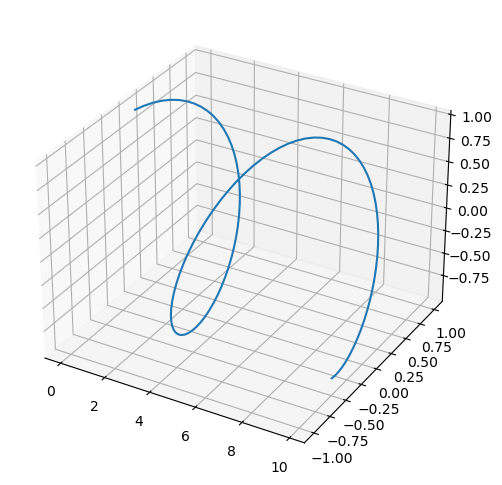

In [85]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, z)